## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as st

import matplotlib
matplotlib.style.use('ggplot')

# Enable inline plotting
%matplotlib inline

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [8]:
## How many observations do we have?
len(df)

130

In [9]:
# What do the data look like?
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


### 1 - Is the distribution of body temperatures normal?

(array([  4.,   6.,  15.,  29.,  27.,  30.,  15.,   1.,   2.,   1.]),
 array([  96.3 ,   96.75,   97.2 ,   97.65,   98.1 ,   98.55,   99.  ,
          99.45,   99.9 ,  100.35,  100.8 ]),
 <a list of 10 Patch objects>)

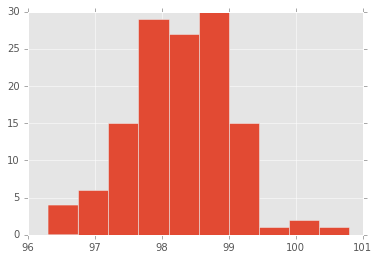

In [5]:
plt.hist(df.temperature)

This actually looks pretty normal, although it has a slightly bigger tail to the left. 

### 2 - Is the true population mean really 98.6 degrees F?  
- Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?

Let's calculate the sample mean and the sample standard deviation

In [41]:
mean = df.temperature.mean()
mean

98.24923076923078

In [42]:
df.temperature.std()

0.7331831580389454

Now calculate the standard deviation of the sample mean, which is the sample standard deviation divided by the square root of the sample size, 130 in this case.

In [63]:
std = df.temperature.std()/np.sqrt(len(df))
std

0.06430441683789101

Let's define the hypotheses:  
H0: true population mean is 98.6   
H1: true population mean is not equal to 98.6

This is a two-sided test. Because of the large sample of 130 (> 30) and we can estimate the standard deviation, it is safe to apply a z-test. A student distribution has bigger tails, but converges to a normal distribution. Therefore, the p-value will be higher and the confidence interval will be larger.  

The p-value is (we have to multiply the probability to the right by 2, because we are dealing with a two-sided test):

In [104]:
print (1 - st.norm.cdf((98.6 - mean)/std))*2

4.90215701365e-08


#### Hence we can state that we are confident that the true mean is not equal to 98.6

Compared to the p-value for a t-statistic, which is somewhat higher, but still very small.

In [105]:
print (1 - st.t.cdf((98.6 - mean)/std, 129))*2

2.41063204287e-07


### 3 -  At what temperature should we consider someone's temperature to be "abnormal"?
- Start by computing the margin of error and confidence interval.

The 95% confidence interval for a two-sided test is:

In [70]:
z = st.norm.ppf(0.975)
margin_of_error = std*z
print "[%s ; %s]" % (mean - margin_of_error, mean + margin_of_error)

[98.1231964282 ; 98.3752651103]


#### The value 98.6 does not lie in the 95% confidence interval. Thus we reject H0! Of course, we already knew this based on the p-value.  
This confidence interval of the sample mean unfortunately doesn't tell much about a temperature being abnormal or not, because most of the cases in the sample are not in the confidence interval. Looking at the histogram, values below 97 and values above 99.5 can be assumed abnormal. Maybe a boxplot will give us more insight. Actually the boxplot shows approximately the same result. 

{'boxes': [<matplotlib.lines.Line2D at 0xb12f5c0>],
 'caps': [<matplotlib.lines.Line2D at 0xb144278>,
 'fliers': [<matplotlib.lines.Line2D at 0xb150320>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xb144d68>],
 'whiskers': [<matplotlib.lines.Line2D at 0xb12f6d8>,
  <matplotlib.lines.Line2D at 0xb12fcc0>]}

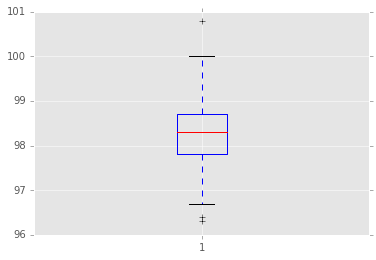

In [72]:
plt.boxplot(df.temperature)

### 4 -  Is there a significant difference between males and females in normal temperature?
  - Set up and solve for a two sample hypothesis testing.

Let's define the hypotheses: 

H0: there is no difference between men and women  
H1: there is a difference between men and women  

OR  

H0: $\mu_F = \mu_M$  
H1: $\mu_F \neq \mu_M$  

Let's assume H0 is true, how probable or improbable is the result we got? If H0 is true then there is no difference. 


In [76]:
mean_F = df[df.gender == "F"].temperature.mean()
mean_F

98.39384615384613

In [77]:
mean_M = df[df.gender == "M"].temperature.mean()
mean_M

98.1046153846154

In [82]:
var_F = df[df.gender == "F"].temperature.var()
var_F

0.5527740384615375

In [83]:
var_M = df[df.gender == "M"].temperature.var()
var_M

0.488259615384615

Thus the standard deviation of the difference of sample means is:

In [85]:
len(df[df.gender == "F"])

65

In [88]:
std_diff = np.sqrt(var_F/len(df[df.gender == "F"]) + var_M/len(df[df.gender == "M"]))
std_diff

0.12655395041982642

In [89]:
mean_diff = mean_F - mean_M
mean_diff

0.289230769230727

Let's create a 95% confidence interval:

In [90]:
z = st.norm.ppf(0.975)
margin_of_error = std_diff*z
print "[%s ; %s]" % (mean_diff - margin_of_error, mean_diff + margin_of_error)

[0.0411895843066 ; 0.537271954155]


#### Well, the 95% confidence interval does not contain zero, thus with confidence we reject H0.

In [106]:
print (1 - st.norm.cdf(mean_diff/std_diff))*2

0.0222873607607
